**Image Classification with MNIST dataset using** **CNN**

In [1]:
#Importing required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
#Loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
#Checking the shape of x_train
x_train.shape

(60000, 28, 28)

In [4]:
#Checking the shape of y_train
y_train.shape

(60000,)

In [6]:
#Checking the shape of x_test
x_test.shape

(10000, 28, 28)

In [8]:
#Checking the shape of y_test
y_test.shape

(10000,)

3


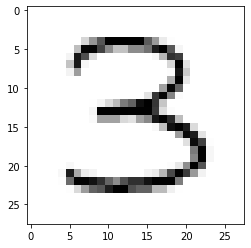

In [9]:
#Visualizing the image 7778. We can visualize any image till 60000
image_index = 7778
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [10]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [11]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [12]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [13]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [14]:
#Compiling the model+
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2137 - accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0839 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0593 - accuracy: 0.9811
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0445 - accuracy: 0.9858
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0368 - accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0290 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0252 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0224 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0205 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 29s 15m

In [15]:
#Model evaluation on test dataset
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0564 - accuracy: 0.9860


[0.05638844519853592, 0.9860000014305115]

4


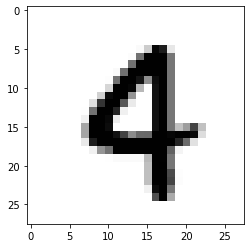

In [17]:
#Testing the model prediction
image_index = 5559
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())